dt=0.200, dx=0.089, drift=0.006


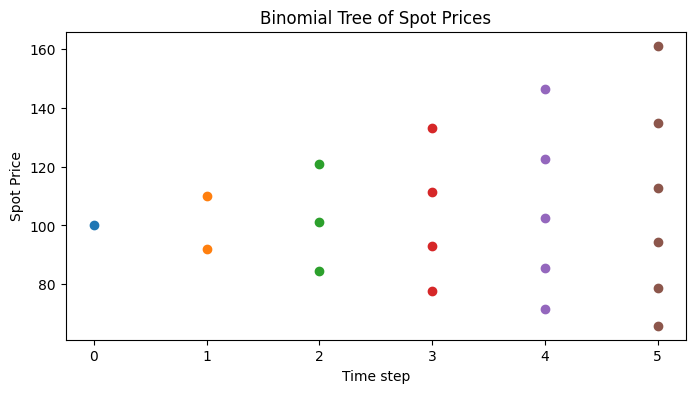

Call values at maturity: [0, 0, 0, 12.686869416549342, 34.76039413984799, 61.15776330245731]


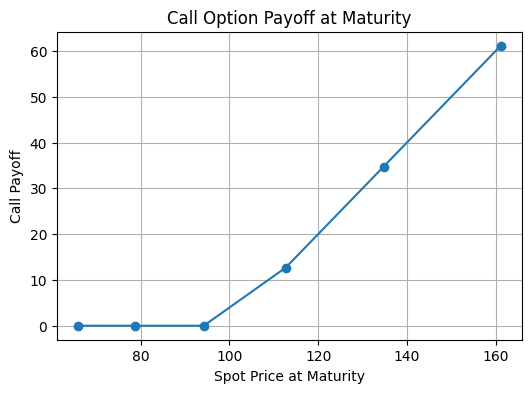

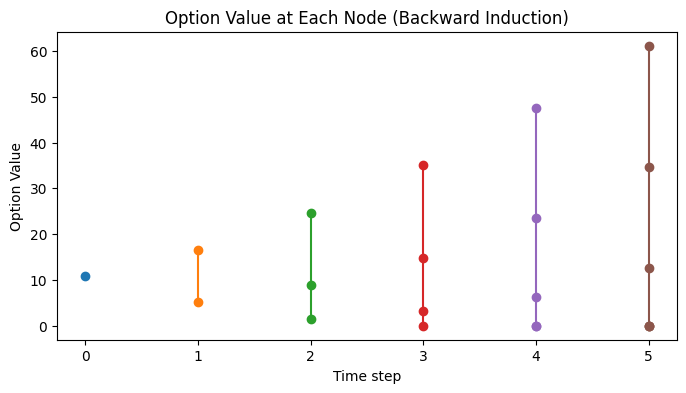

European Call Option Price (Binomial Tree): 10.755682734171089


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100      # Initial spot price
K = 100       # Strike price
T = 1.0       # Time to maturity (years)
r = 0.05      # Risk-free interest rate
sigma = 0.2   # Volatility
N = 5         # Number of time steps (keep it small to visualize)

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt

print(f"dt={dt:.3f}, dx={dx:.3f}, drift={drift:.3f}")


# Tree of log-prices
logS_tree = []
for n in range(N+1):  # 0,1,...,N
    row = []
    for j in range(n+1):  # up-moves: 0,...,n
        logS = np.log(S0) + n*drift + (2*j - n)*dx
        row.append(logS)
    logS_tree.append(row)


# Plot tree of spot prices
plt.figure(figsize=(8,4))
for n in range(N+1):
    S_nodes = [np.exp(logS_tree[n][j]) for j in range(n+1)]
    plt.plot([n]*len(S_nodes), S_nodes, 'o', label=f"Step {n}" if n==0 else "")
plt.xlabel("Time step")
plt.ylabel("Spot Price")
plt.title("Binomial Tree of Spot Prices")
plt.show()


call_values = []
for j in range(N+1):
    S = np.exp(logS_tree[N][j])
    call_values.append(max(S - K, 0))

print("Call values at maturity:", call_values)

# Plot terminal payoffs
plt.figure(figsize=(6,4))
S_terminal = [np.exp(logS_tree[N][j]) for j in range(N+1)]
plt.plot(S_terminal, call_values, 'o-')
plt.xlabel("Spot Price at Maturity")
plt.ylabel("Call Payoff")
plt.title("Call Option Payoff at Maturity")
plt.grid(True)
plt.show()

# Backward induction
option_tree = [call_values]  # Last row is at maturity
for n in range(N-1, -1, -1):  # N-1 down to 0
    row = []
    for j in range(n+1):
        v_up = option_tree[0][j+1]
        v_dn = option_tree[0][j]
        v = np.exp(-r*dt) * 0.5 * (v_up + v_dn)
        row.append(v)
    option_tree.insert(0, row)  # Insert at beginning

# Plot option values at each step
plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(option_tree[n]), option_tree[n], 'o-')
plt.xlabel("Time step")
plt.ylabel("Option Value")
plt.title("Option Value at Each Node (Backward Induction)")
plt.show()


print("European Call Option Price (Binomial Tree):", option_tree[0][0])


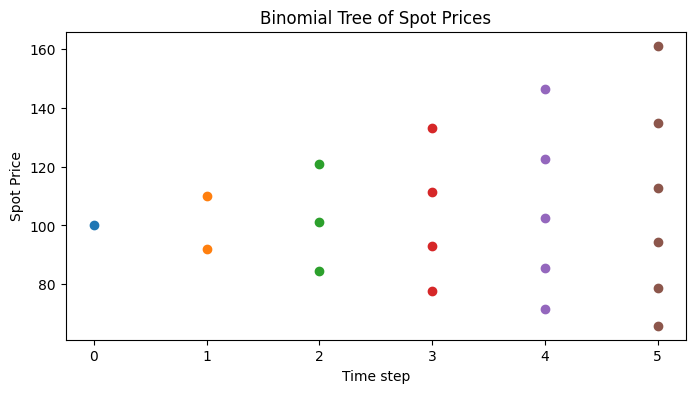

Put payoffs at maturity: [34.111982892655945, 21.205592093813763, 5.77104927635709, 0, 0, 0]


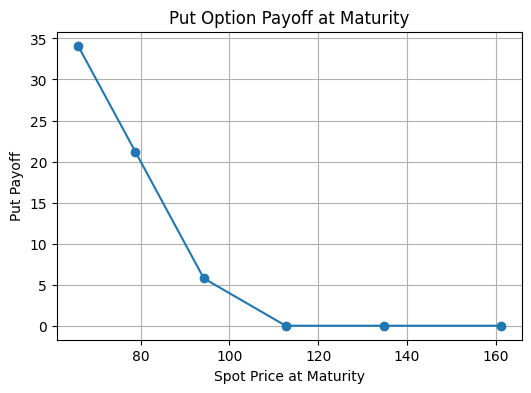

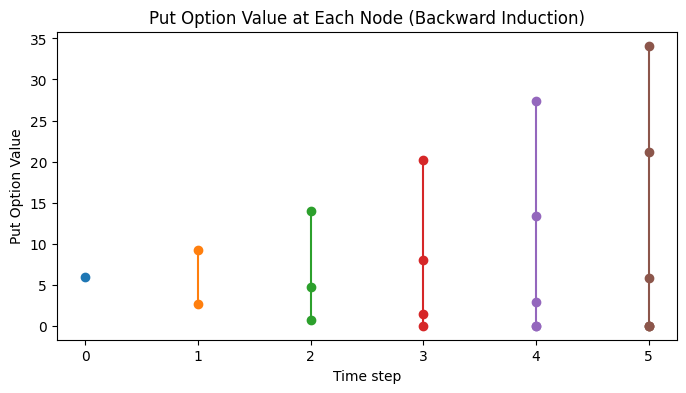

European Put Option Price (Binomial Tree): 5.88128614039626


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (same as before, can change if you like)
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 5

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt

logS_tree = []
for n in range(N+1):  # Steps 0 to N
    row = []
    for j in range(n+1):  # 0 to n up-moves
        logS = np.log(S0) + n*drift + (2*j - n)*dx
        row.append(logS)
    logS_tree.append(row)

plt.figure(figsize=(8,4))
for n in range(N+1):
    S_nodes = [np.exp(logS_tree[n][j]) for j in range(n+1)]
    plt.plot([n]*len(S_nodes), S_nodes, 'o', label=f"Step {n}" if n==0 else "")
plt.xlabel("Time step")
plt.ylabel("Spot Price")
plt.title("Binomial Tree of Spot Prices")
plt.show()

put_values = []
for j in range(N+1):
    S = np.exp(logS_tree[N][j])
    put_values.append(max(K - S, 0))

print("Put payoffs at maturity:", put_values)

plt.figure(figsize=(6,4))
S_terminal = [np.exp(logS_tree[N][j]) for j in range(N+1)]
plt.plot(S_terminal, put_values, 'o-')
plt.xlabel("Spot Price at Maturity")
plt.ylabel("Put Payoff")
plt.title("Put Option Payoff at Maturity")
plt.grid(True)
plt.show()

option_tree = [put_values]  # Last row is at maturity
for n in range(N-1, -1, -1):
    row = []
    for j in range(n+1):
        v_up = option_tree[0][j+1]
        v_dn = option_tree[0][j]
        v = np.exp(-r*dt) * 0.5 * (v_up + v_dn)
        row.append(v)
    option_tree.insert(0, row)

plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(option_tree[n]), option_tree[n], 'o-')
plt.xlabel("Time step")
plt.ylabel("Put Option Value")
plt.title("Put Option Value at Each Node (Backward Induction)")
plt.show()

print("European Put Option Price (Binomial Tree):", option_tree[0][0])


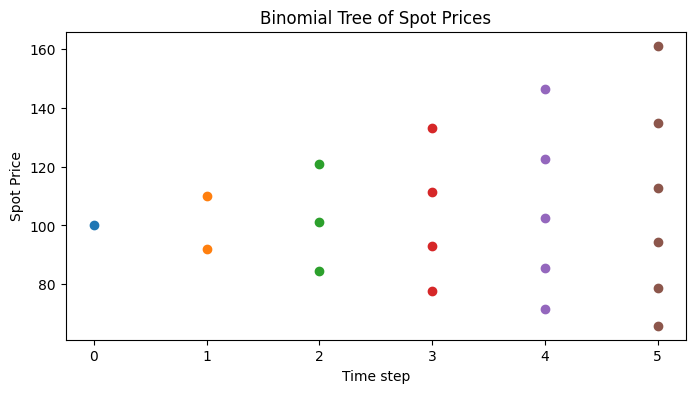

Forward contract payoffs at maturity: [-34.111982892655945, -21.205592093813763, -5.77104927635709, 12.686869416549342, 34.76039413984799, 61.15776330245731]


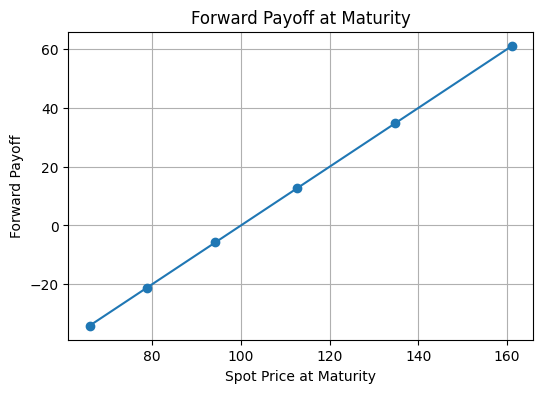

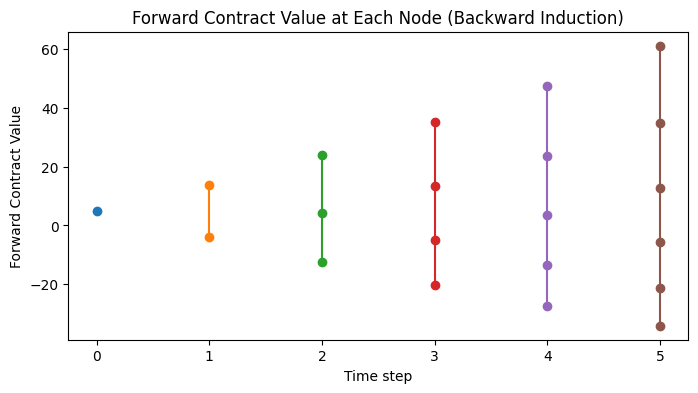

Forward Contract Value (Binomial Tree): 4.874396593774829


In [4]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 5

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt

logS_tree = []
for n in range(N+1):
    row = []
    for j in range(n+1):
        logS = np.log(S0) + n*drift + (2*j - n)*dx
        row.append(logS)
    logS_tree.append(row)

plt.figure(figsize=(8,4))
for n in range(N+1):
    S_nodes = [np.exp(logS_tree[n][j]) for j in range(n+1)]
    plt.plot([n]*len(S_nodes), S_nodes, 'o', label=f"Step {n}" if n==0 else "")
plt.xlabel("Time step")
plt.ylabel("Spot Price")
plt.title("Binomial Tree of Spot Prices")
plt.show()

forward_values = []
for j in range(N+1):
    S = np.exp(logS_tree[N][j])
    forward_values.append(S - K)

print("Forward contract payoffs at maturity:", forward_values)

plt.figure(figsize=(6,4))
S_terminal = [np.exp(logS_tree[N][j]) for j in range(N+1)]
plt.plot(S_terminal, forward_values, 'o-')
plt.xlabel("Spot Price at Maturity")
plt.ylabel("Forward Payoff")
plt.title("Forward Payoff at Maturity")
plt.grid(True)
plt.show()

option_tree = [forward_values]  # Start from maturity
for n in range(N-1, -1, -1):
    row = []
    for j in range(n+1):
        v_up = option_tree[0][j+1]
        v_dn = option_tree[0][j]
        v = np.exp(-r*dt) * 0.5 * (v_up + v_dn)
        row.append(v)
    option_tree.insert(0, row)

plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(option_tree[n]), option_tree[n], 'o-')
plt.xlabel("Time step")
plt.ylabel("Forward Contract Value")
plt.title("Forward Contract Value at Each Node (Backward Induction)")
plt.show()

print("Forward Contract Value (Binomial Tree):", option_tree[0][0])


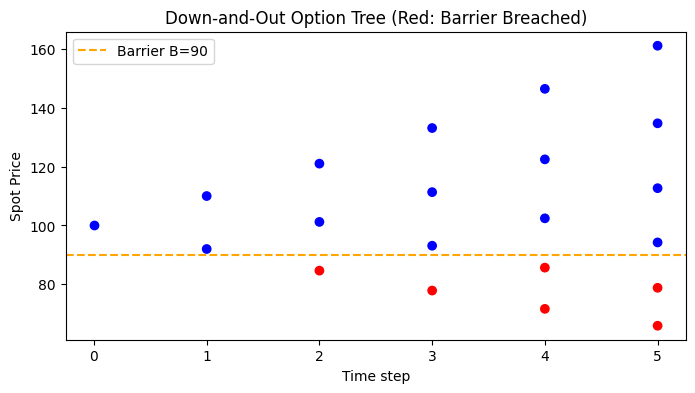

Down-and-out call payoffs at maturity: [0, 0, 0, 12.686869416549342, 34.76039413984799, 61.15776330245731]


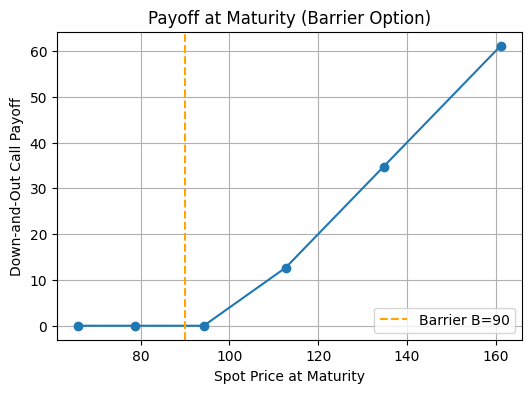

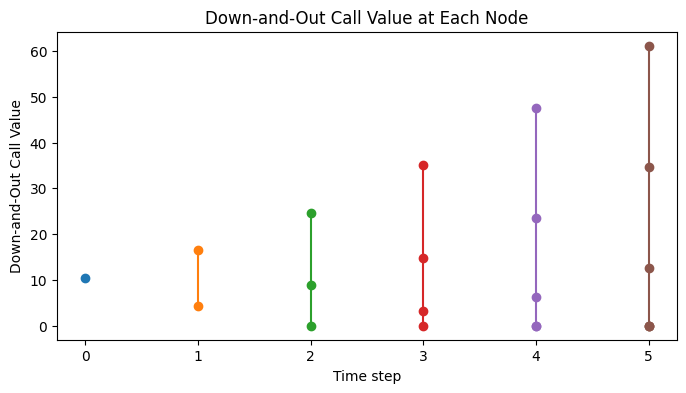

Down-and-Out Call Option Price (Binomial Tree): 10.378553874989214


In [7]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100     # Initial spot
K = 100      # Strike
T = 1.0      # Maturity
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
N = 5        # Time steps
B = 90       # Barrier (must be < S0 for down-and-out)

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt

logS_tree = []
barrier_breach = []  # Will be True at nodes where S < B

for n in range(N+1):
    row = []
    br_row = []
    for j in range(n+1):
        logS = np.log(S0) + n*drift + (2*j - n)*dx
        S = np.exp(logS)
        row.append(S)
        br_row.append(S < B)
    logS_tree.append(row)
    barrier_breach.append(br_row)

# Plot: Red nodes = S < B (barrier breached)
plt.figure(figsize=(8,4))
for n in range(N+1):
    S_nodes = logS_tree[n]
    colors = ['red' if barrier_breach[n][j] else 'blue' for j in range(n+1)]
    plt.scatter([n]*len(S_nodes), S_nodes, c=colors)
plt.axhline(B, color='orange', linestyle='--', label=f'Barrier B={B}')
plt.xlabel("Time step")
plt.ylabel("Spot Price")
plt.title("Down-and-Out Option Tree (Red: Barrier Breached)")
plt.legend()
plt.show()


call_values = []
for j in range(N+1):
    S = logS_tree[N][j]
    value = max(S - K, 0) if S >= B else 0
    call_values.append(value)
print("Down-and-out call payoffs at maturity:", call_values)


plt.figure(figsize=(6,4))
S_terminal = logS_tree[N]
plt.plot(S_terminal, call_values, 'o-')
plt.axvline(B, color='orange', linestyle='--', label=f'Barrier B={B}')
plt.xlabel("Spot Price at Maturity")
plt.ylabel("Down-and-Out Call Payoff")
plt.title("Payoff at Maturity (Barrier Option)")
plt.legend()
plt.grid(True)
plt.show()


option_tree = [call_values]  # Last row is at maturity

for n in range(N-1, -1, -1):
    row = []
    for j in range(n+1):
        S = logS_tree[n][j]
        if S < B:
            v = 0  # Already knocked out
        else:
            v_up = option_tree[0][j+1]
            v_dn = option_tree[0][j]
            v = np.exp(-r*dt) * 0.5 * (v_up + v_dn)
        row.append(v)
    option_tree.insert(0, row)


plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(option_tree[n]), option_tree[n], 'o-')
plt.xlabel("Time step")
plt.ylabel("Down-and-Out Call Value")
plt.title("Down-and-Out Call Value at Each Node")
plt.show()


print("Down-and-Out Call Option Price (Binomial Tree):", option_tree[0][0])



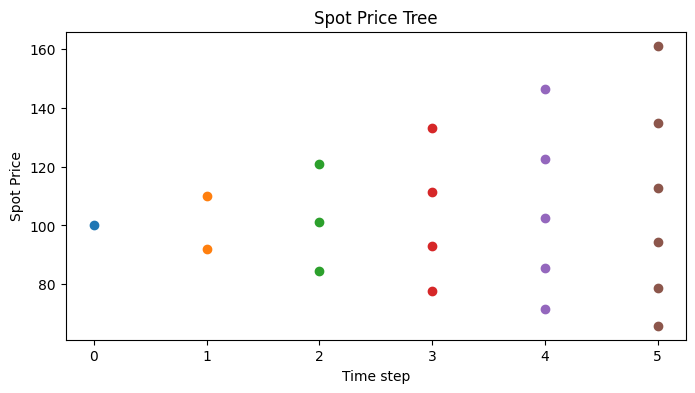

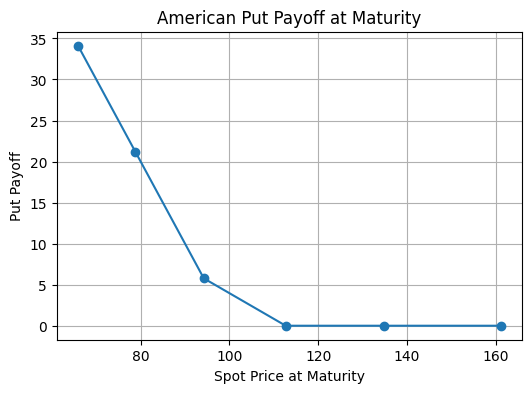

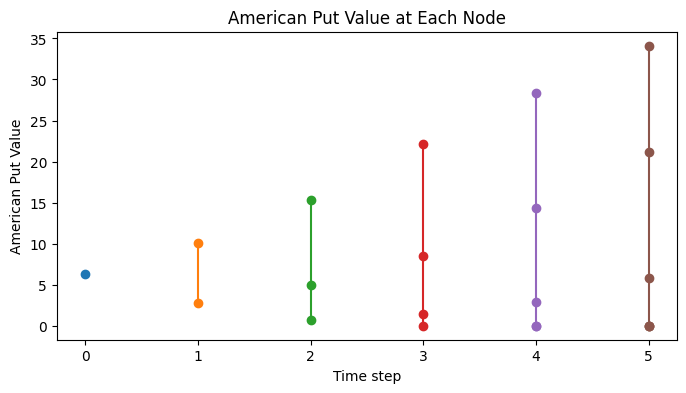

American Put Option Price (Binomial Tree): 6.347502832778775


In [8]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 5

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt


logS_tree = []
for n in range(N+1):
    row = []
    for j in range(n+1):
        logS = np.log(S0) + n*drift + (2*j - n)*dx
        S = np.exp(logS)
        row.append(S)
    logS_tree.append(row)


plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(logS_tree[n]), logS_tree[n], 'o')
plt.xlabel("Time step")
plt.ylabel("Spot Price")
plt.title("Spot Price Tree")
plt.show()


put_values = []
for j in range(N+1):
    S = logS_tree[N][j]
    put_values.append(max(K - S, 0))


plt.figure(figsize=(6,4))
S_terminal = logS_tree[N]
plt.plot(S_terminal, put_values, 'o-')
plt.xlabel("Spot Price at Maturity")
plt.ylabel("Put Payoff")
plt.title("American Put Payoff at Maturity")
plt.grid(True)
plt.show()


option_tree = [put_values]  # Start with final payoffs

for n in range(N-1, -1, -1):
    row = []
    for j in range(n+1):
        S = logS_tree[n][j]
        immediate_exercise = max(K - S, 0)
        v_up = option_tree[0][j+1]
        v_dn = option_tree[0][j]
        discounted_future = np.exp(-r*dt) * 0.5 * (v_up + v_dn)
        value = max(immediate_exercise, discounted_future)
        row.append(value)
    option_tree.insert(0, row)


plt.figure(figsize=(8,4))
for n in range(N+1):
    plt.plot([n]*len(option_tree[n]), option_tree[n], 'o-')
plt.xlabel("Time step")
plt.ylabel("American Put Value")
plt.title("American Put Value at Each Node")
plt.show()


print("American Put Option Price (Binomial Tree):", option_tree[0][0])


In [9]:
import numpy as np

# Parameters
S0 = 100       # Initial spot
K = 100        # Strike
T = 1.0        # Maturity
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
N = 5          # Time steps

dt = T / N
dx = sigma * np.sqrt(dt)
drift = (r - 0.5 * sigma**2) * dt

# Build tree of log-spot prices
logS_tree = [[np.log(S0) + n*drift + (2*j - n)*dx for j in range(n+1)] for n in range(N+1)]

# Terminal payoff: digital call
digital_values = [1 if np.exp(logS_tree[N][j]) > K else 0 for j in range(N+1)]

# Backward induction
option_tree = [digital_values]
for n in range(N-1, -1, -1):
    row = [np.exp(-r*dt)*0.5*(option_tree[0][j+1]+option_tree[0][j]) for j in range(n+1)]
    option_tree.insert(0, row)

# Price at t=0
print("Digital Call Option Price (Binomial Tree):", option_tree[0][0])


Digital Call Option Price (Binomial Tree): 0.47561471225035706


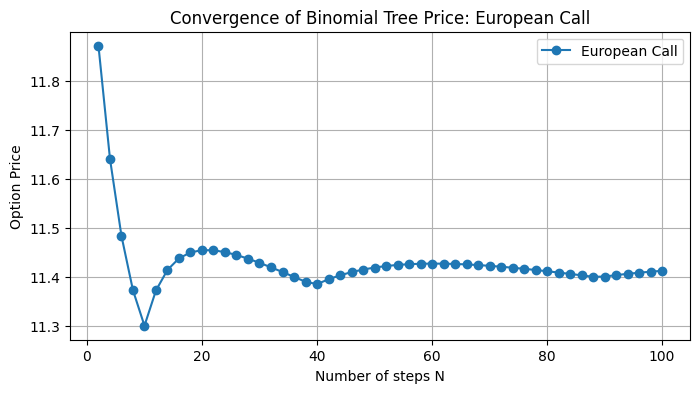

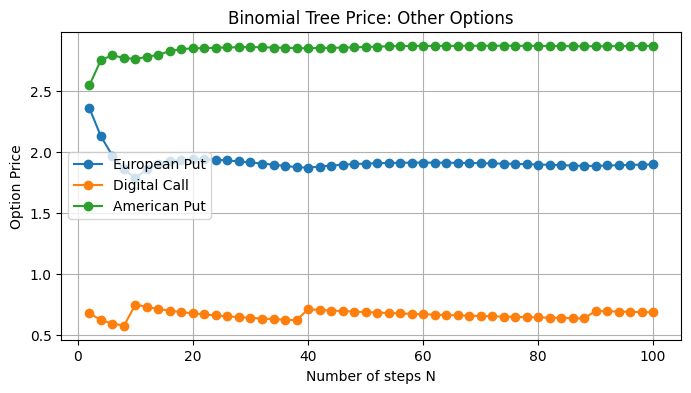

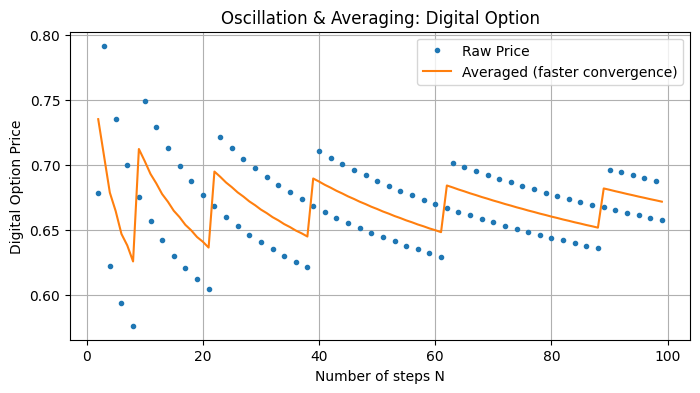

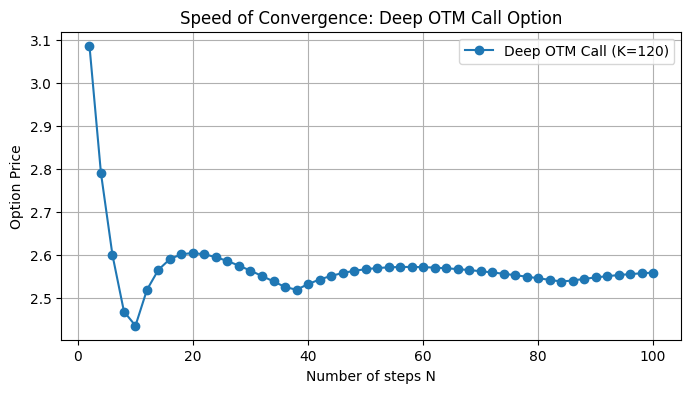

In [10]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 100
K = 100
r = 0.05
sigma = 0.1
T = 2


def binomial_tree_price(S0, K, r, sigma, T, N, final_payoff, backward_rule):
    dt = T / N
    dx = sigma * np.sqrt(dt)
    drift = (r - 0.5 * sigma**2) * dt
    
    # 1. Build spot price tree (log-space, recombining)
    logS_tree = [[np.log(S0) + n*drift + (2*j-n)*dx for j in range(n+1)] for n in range(N+1)]
    S_tree = [[np.exp(logS_tree[n][j]) for j in range(n+1)] for n in range(N+1)]
    
    # 2. Terminal payoffs
    values = [final_payoff(S_tree[N][j], K) for j in range(N+1)]
    
    # 3. Backward induction
    for n in range(N-1, -1, -1):
        values = [backward_rule(S_tree[n][j], values[j], values[j+1], r, dt, K) for j in range(n+1)]
    
    # 4. Return price at root
    return values[0]


def call_payoff(S, K):
    return max(S-K, 0)

def euro_backward(S, down, up, r, dt, K):
    return np.exp(-r*dt) * 0.5 * (down + up)

def put_payoff(S, K):
    return max(K-S, 0)

def digital_payoff(S, K):
    return 1.0 if S > K else 0.0

def amer_put_backward(S, down, up, r, dt, K):
    # Early exercise allowed!
    hold = np.exp(-r*dt) * 0.5 * (down + up)
    exercise = max(K-S, 0)
    return max(hold, exercise)

N_vals = np.arange(2, 101, 2)
call_prices = []
put_prices = []
digital_prices = []
amer_put_prices = []

for N in N_vals:
    call_prices.append(binomial_tree_price(S0, K, r, sigma, T, N, call_payoff, euro_backward))
    put_prices.append(binomial_tree_price(S0, K, r, sigma, T, N, put_payoff, euro_backward))
    digital_prices.append(binomial_tree_price(S0, K, r, sigma, T, N, digital_payoff, euro_backward))
    amer_put_prices.append(binomial_tree_price(S0, K, r, sigma, T, N, put_payoff, amer_put_backward))

plt.figure(figsize=(8,4))
plt.plot(N_vals, call_prices, 'o-', label="European Call")
plt.xlabel("Number of steps N")
plt.ylabel("Option Price")
plt.title("Convergence of Binomial Tree Price: European Call")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(N_vals, put_prices, 'o-', label="European Put")
plt.plot(N_vals, digital_prices, 'o-', label="Digital Call")
plt.plot(N_vals, amer_put_prices, 'o-', label="American Put")
plt.xlabel("Number of steps N")
plt.ylabel("Option Price")
plt.title("Binomial Tree Price: Other Options")
plt.grid(True)
plt.legend()
plt.show()

N_vals_fine = np.arange(2, 101)
digital_fine = [binomial_tree_price(S0, K, r, sigma, T, N, digital_payoff, euro_backward) for N in N_vals_fine]
digital_avg = 0.5 * (np.array(digital_fine[:-1]) + np.array(digital_fine[1:]))

plt.figure(figsize=(8,4))
plt.plot(N_vals_fine[:-1], digital_fine[:-1], '.', label="Raw Price")
plt.plot(N_vals_fine[:-1], digital_avg, '-', label="Averaged (faster convergence)")
plt.xlabel("Number of steps N")
plt.ylabel("Digital Option Price")
plt.title("Oscillation & Averaging: Digital Option")
plt.grid(True)
plt.legend()
plt.show()

K_far = 120
call_prices_far = [binomial_tree_price(S0, K_far, r, sigma, T, N, call_payoff, euro_backward) for N in N_vals]

plt.figure(figsize=(8,4))
plt.plot(N_vals, call_prices_far, 'o-', label="Deep OTM Call (K=120)")
plt.xlabel("Number of steps N")
plt.ylabel("Option Price")
plt.title("Speed of Convergence: Deep OTM Call Option")
plt.grid(True)
plt.legend()
plt.show()

